#Preparing classification data

In [ ]:
!pip install nlp-id
!pip install nltk==3.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 28.9 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.14.0-py3-none-any.whl size=8074110 sha256=179f58c0a01abb0eed517d299a188eb37c9c4f681e33b4d56c3b1bbc65bafbaf
  Stored in directory: /root/.cache/pip/wheels/16/5d/1e/051d2642dfffeb89716569b4dad1552b6e8dd980572c5e3496
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=8387caf204200e96aca1a83dde6955bf82a016e20a306ac00193e744f6d390ee
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.2.2
    Uninstalling pytest-7.2.2:
      Su

In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
import pandas as pd
import numpy as np

## Data Collection

In [ ]:
pd.set_option('display.max_colwidth', None)
url = 'https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/re_dataset.csv'
df = pd.read_csv(url, encoding='latin-1')
df.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
13164,USER jangan asal ngomong ndasmu. congor lu yg sekate2 anjyng',1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \xf0\x9f\x98\xaa',0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut Revolusi Jiwa',0,0,0,0,0,0,0,0,0,0,0,0
13168,"USER Mana situ ngasih("": itu cuma foto ya kutil onta'",1,1,1,0,0,0,0,0,1,1,0,0


In [ ]:
url = 'https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/new_kamusalay.csv'
slang_dict = pd.read_csv(url, encoding='latin-1', header=None)
slang_dict.tail()

,0,1
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit
15166,megangin,memegang


In [ ]:
df.count()

Tweet            13169
HS               13169
Abusive          13169
HS_Individual    13169
HS_Group         13169
HS_Religion      13169
HS_Race          13169
HS_Physical      13169
HS_Gender        13169
HS_Other         13169
HS_Weak          13169
HS_Moderate      13169
HS_Strong        13169
dtype: int64

[Text(0, 0, '7608'), Text(0, 0, '5561')]

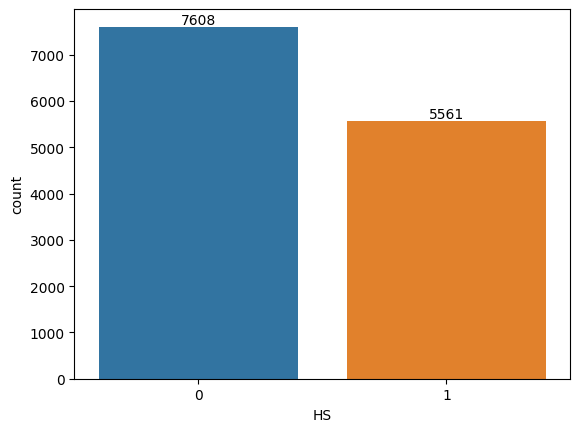

In [ ]:
import seaborn as sns
ax = sns.countplot(x='HS', data=df)
ax.bar_label(ax.containers[0])

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [ ]:
stop_words = stopwords.words('indonesian')

## Data Preprocessing

In [ ]:
from nlp_id.lemmatizer import Lemmatizer
lemmatizer = Lemmatizer()
lemmatizer.lemmatize('Saya sedang mencoba')

'saya sedang coba'

In [ ]:
def clean_tweet(x):
  x = re.sub('USER', '', x)
  x = re.sub('RT', '', x)
  x = re.sub('URL', '', x)
  x = re.sub('x[0-9a-zA-Z][0-9a-zA-Z]', '', x)
  x = x.replace('\\n', ' ')
  x = x.lower()
  x = re.sub(r'[^\w\s]', '', x)
  x = re.sub('[0-9]+', '', x)
  x = lemmatizer.lemmatize(x)
  x_tokens = word_tokenize(x)
  return x_tokens

def remove_slangs(x):
  for count, value in enumerate(x):
    slang = slang_dict.index[slang_dict[0] == value]
    if len(slang)!=0:
      translation = word_tokenize(slang_dict.iloc[slang[0]][1])
      del x[count]
      x[count:count]=translation

def process_tweet(x):
  cleaned = clean_tweet(x)
  remove_slangs(cleaned)
  cleaned = [i for i in cleaned if i not in stop_words]
  return " ".join(i for i in cleaned)

In [ ]:
df["filtered"] = df['Tweet'].apply(process_tweet)

In [ ]:
df['filtered'].tail()

13164                             berbicara ndasmu congor kate anjing
13165                                               kasur enak kunyuk
13166                                        hati hati bisu bosan duh
13167    bom real mudah deteksi bom kubur dahsyat ledak revolusi jiwa
13168                                         situ foto ya kutil onta
Name: filtered, dtype: object

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

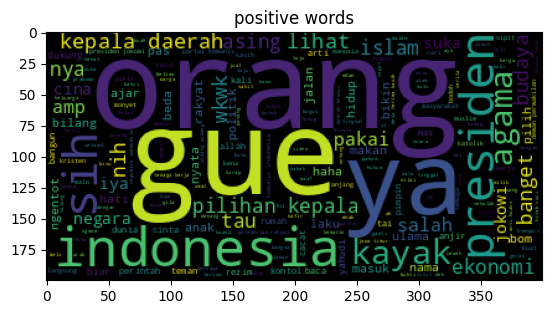

In [ ]:
data = df.loc[df['HS'] == 0]['filtered']
wc_pos = WordCloud().generate(' '.join(data))
plt.title('positive words')
plt.imshow(wc_pos)

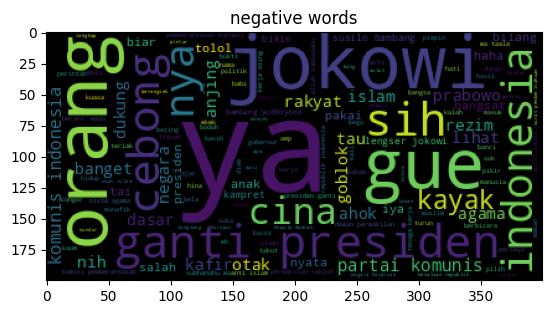

In [ ]:
data = df.loc[df['HS'] == 1]['filtered']
wc_neg = WordCloud().generate(' '.join(data))
plt.title('negative words')
plt.imshow(wc_neg)

In [ ]:
remove_words = ['ya', 'orang', 'nya', 'sih', 'indonesia', 'gue', 'kayak']
def remove_common_word(x):
  x_tokens = word_tokenize(x)
  no_slang = [i for i in x_tokens if i not in remove_words]
  return " ".join(str(i) for i in no_slang)

In [ ]:
df["filtered"] = df['filtered'].apply(remove_common_word)

In [ ]:
df.to_csv('output.csv', encoding = 'utf-8-sig')